<a href="https://colab.research.google.com/github/codestates/ds-cs-section1-sprint1/blob/master/n113-data-manipulation/n113_data-manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3*

---

# Join and Reshape

## 🏆 학습 목표 

- pandas를 통해 데이터를 concat / merge 할 수 있다.
- Tidy 데이터 에 대한 개념을 이해한다
- `.melt()`와 `.pivot()` 함수를 사용하여 wide와 tidy 형태의 데이터를 서로 변환 할 수 있다.

---

# pandas 로 데이터 합치기

## 개요

상당히 많은 경우, 데이터는 여러개의 파일들을 통해 구성되어 있습니다.

<img src='https://i.imgur.com/aD1rHaj.png' width = 600>

위의 그림처럼, 주가 데이터를 예로 들면, 종목별 데이터와 어떤 데이터가 어떤 종목을 의미하는지 설명하는 description 데이터로 나누어 질 수 있을 것입니다.

우리가 효과적인 데이터 분석을 하기 위해서는 여러개의 파일을 하나로 합치는 것이 필요하겠죠.

pandas를 통해서 더하는 방법에는 여러가지가 있지만, 그중에 2가지를 배워보겠습니다.


## Concat

`concat`은 '더한다' 혹은 '접합한다'라는 의미를 생각하면 이해가 편합니다. 
예를 들어, 2개의 문자열을 `+` 연산자를 이용해 "더할" 수 있습니다.

In [3]:
'"+" 연산자를 ' + '사용하여 ' +  '문자열을 ' + '더할 수 ' + '있습니다.'

'"+" 연산자를 사용하여 문자열을 더할 수 있습니다.'

### 🔥 string + 

다른 방법으로 문자열을 **더할** 수 있습니다. 
- tostring
- join
 
한편 문자열을 **나누는** 방법도 있습니다.
 - split

### data.frame

data.frame도 마찬가지로, 열이나 행을 기준으로 **더할** 수 있습니다.
간단한 예시를 통해 알아봅시다

In [4]:
import pandas as pd

<img src='https://i.imgur.com/NKlbzcN.png' width = 400>
<br>
<img src='https://i.imgur.com/771YsZY.png' width = 200>
<br>
<img src='https://i.imgur.com/RL15ljt.png' width = 200>

---


### Index 가 다른 경우

<img src='https://i.imgur.com/SBnLzgV.png' width = 400>
<br>
<img src='https://i.imgur.com/ZlyY7H7.png' width = 200>
<br>
<img src='https://i.imgur.com/0dEtj8O.png' width = 200>

### using python

In [5]:
x = pd.DataFrame([['AX','AY'],['BX','BY']], index = ['A','B'], columns = ['X','Y'])
y = pd.DataFrame([['AX','AZ'],['CX','CZ']], index = ['A','C'], columns = ['X','Z'])

print(x)
print(y)

# pd.concat([x, y]) ## concate_by_row = pd.concat([x, y])

pd.concat([x, y], axis = 1) ## concate_by_col = pd.concat([x, y], axis = 1)

    X   Y
A  AX  AY
B  BX  BY
    X   Z
A  AX  AZ
C  CX  CZ


,X,Y,X,Z
A,AX,AY,AX,AZ
B,BX,BY,NaN,NaN
C,NaN,NaN,CX,CZ


데이터프레임을 더할 때, 일반적으로는 더해지는 행, 열의 이름이나 인덱스 값이 일치해야 합니다.

만약 그렇지 않은 경우, 비어있는 부분에 대해서는 (결측치를 의미하는) `NaN` 값으로 채워지겠죠.

### 🔥 위의 ABCD-EFGH 예시를 직접 구현해보세요. (Assignment) 

## Stocks

이번에는 제가 **치맥 주식**이라 이름 붙인 실제 데이터를 기반으로 concat을 연습해보겠습니다.

- `000080.csv`
- `000890.csv`
- `005300.csv`
- `027740.csv`
- `035810.csv`
- `136480.csv`



여러개의 파일로 구성되어 있기 때문에, 각각 잘 로드되었는지 확인하는 것 뿐만 아니라 데이터프레임을 하나로 합치는 것 또한 필요합니다.

이번 연습의 목표 중 하나는 아래 그림처럼 **최근 분기에 해당하는 데이터**와 **추가 정보**를 더해, 하나의 데이터프레임으로 합치는 것입니다.



|종목코드|테마|매출|영업이익|...|현금배당성향(%)|발행주식수(보통주)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|000080|주류|6,243|644|...|0|70,133,611|
|||||...||
|136480|육계|2,613|1|...|0|106,209,702|



### 데이터 준비

url은 `https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/`에 위의 파일명들을 붙여서 접근 할 수 있습니다.



In [6]:
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv')
df1.head()

,Unnamed: 0,2019/09\n(IFRS연결),2019/12\n(IFRS연결),2020/03\n(IFRS연결),2020/06\n(IFRS연결),2020/09\n(IFRS연결)
0,매출액,"5,291","5,586","5,339","5,816","6,243"
1,영업이익,492,327,561,541,644
2,영업이익(발표기준),492,327,561,541,644
3,세전계속사업이익,348,39,450,487,465
4,당기순이익,258,-252,334,349,322


In [7]:
df1 = pd.read_csv(urlhead + '000080.csv').transpose()
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
Unnamed: 0,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2019/09\n(IFRS연결),"5,291",492,492,348,258,259,0,"34,061","23,056","11,005","10,998",NaN,"3,688","2,079",-347,-395,483,"1,597","12,615",9.29,4.88,-1.46,-0.50,209.50,220.33,363,NaN,"15,761",1.73,0,NaN,0.00,"70,133,611"
2019/12\n(IFRS연결),"5,586",327,327,39,-252,-251,0,"32,709","22,377","10,332","10,325",NaN,"3,688",601,-475,-910,462,139,"11,715",5.85,-4.50,-3.86,-1.27,216.58,202.85,-353,NaN,"14,796",1.96,700,NaN,-194.53,"70,133,611"
2020/03\n(IFRS연결),"5,339",561,561,450,334,334,0,"36,368","26,164","10,204","10,198",5,"3,688","1,230",-416,"2,713",430,800,"14,452",10.51,6.25,0.46,0.14,256.41,198.70,469,390.26,"14,614",1.84,NaN,NaN,0.00,"70,133,611"
2020/06\n(IFRS연결),"5,816",541,541,487,349,349,0,"43,007","32,393","10,613","10,608",6,"3,688","5,437",-494,"1,617",362,"5,075","16,576",9.30,5.99,6.48,1.79,305.21,208.16,489,45.23,"15,201",2.88,NaN,NaN,0.00,"70,133,611"


? 위의 것을 해결 하려면 어떻게 해야할까요?

---

https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row

```python
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
```

In [8]:
def mydf(myurl):
    df = pd.read_csv(urlhead + myurl).transpose()
    new_header = df.iloc[0] #grab the first row for the header
    df = df[1:] #take the data less the header row
    df.columns = new_header #set the header row as the df header
    return df

In [9]:
df1 = mydf('000080.csv')
df1

Unnamed: 0,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2019/09\n(IFRS연결),"5,291",492,492,348,258,259,0,"34,061","23,056","11,005","10,998",NaN,"3,688","2,079",-347,-395,483,"1,597","12,615",9.29,4.88,-1.46,-0.50,209.50,220.33,363,NaN,"15,761",1.73,0,NaN,0.00,"70,133,611"
2019/12\n(IFRS연결),"5,586",327,327,39,-252,-251,0,"32,709","22,377","10,332","10,325",NaN,"3,688",601,-475,-910,462,139,"11,715",5.85,-4.50,-3.86,-1.27,216.58,202.85,-353,NaN,"14,796",1.96,700,NaN,-194.53,"70,133,611"
2020/03\n(IFRS연결),"5,339",561,561,450,334,334,0,"36,368","26,164","10,204","10,198",5,"3,688","1,230",-416,"2,713",430,800,"14,452",10.51,6.25,0.46,0.14,256.41,198.70,469,390.26,"14,614",1.84,NaN,NaN,0.00,"70,133,611"
2020/06\n(IFRS연결),"5,816",541,541,487,349,349,0,"43,007","32,393","10,613","10,608",6,"3,688","5,437",-494,"1,617",362,"5,075","16,576",9.30,5.99,6.48,1.79,305.21,208.16,489,45.23,"15,201",2.88,NaN,NaN,0.00,"70,133,611"
2020/09\n(IFRS연결),"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"


In [10]:
df2 = mydf('000890.csv')
df3 = mydf('005300.csv')
df4 = mydf('027740.csv')
df5 = mydf('035810.csv')
df6 = mydf('136480.csv')

In [11]:
df = pd.concat([df1, df2, df3, df4, df5, df6])
df

Unnamed: 0,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2019/09\n(IFRS연결),"5,291",492,492,348,258,259,0,"34,061","23,056","11,005","10,998",NaN,"3,688","2,079",-347,-395,483,"1,597","12,615",9.29,4.88,-1.46,-0.50,209.50,220.33,363,NaN,"15,761",1.73,0,NaN,0.00,"70,133,611"
2019/12\n(IFRS연결),"5,586",327,327,39,-252,-251,0,"32,709","22,377","10,332","10,325",NaN,"3,688",601,-475,-910,462,139,"11,715",5.85,-4.50,-3.86,-1.27,216.58,202.85,-353,NaN,"14,796",1.96,700,NaN,-194.53,"70,133,611"
2020/03\n(IFRS연결),"5,339",561,561,450,334,334,0,"36,368","26,164","10,204","10,198",5,"3,688","1,230",-416,"2,713",430,800,"14,452",10.51,6.25,0.46,0.14,256.41,198.70,469,390.26,"14,614",1.84,NaN,NaN,0.00,"70,133,611"
2020/06\n(IFRS연결),"5,816",541,541,487,349,349,0,"43,007","32,393","10,613","10,608",6,"3,688","5,437",-494,"1,617",362,"5,075","16,576",9.30,5.99,6.48,1.79,305.21,208.16,489,45.23,"15,201",2.88,NaN,NaN,0.00,"70,133,611"
2020/09\n(IFRS연결),"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"
2019/09\n(IFRS연결),196,2,2,-3,-2,-2,NaN,"1,855",930,925,925,NaN,618,3,7,-15,5,-2,605,1.10,-1.10,-7.07,-3.06,100.51,50.86,-2,NaN,749,1.62,0,NaN,0.00,"123,524,198"
2019/12\n(IFRS연결),186,-122,-122,-144,-158,-158,NaN,"1,673",873,800,800,NaN,630,15,59,-6,9,6,580,-65.41,-84.56,-19.66,-7.99,109.06,26.33,-126,NaN,635,1.78,0,NaN,0.00,"126,018,258"
2020/03\n(IFRS연결),187,-2,-2,2,0,0,NaN,"1,584",772,812,812,NaN,637,4,13,-47,7,-3,522,-1.03,0.17,-20.39,-8.94,95.06,26.84,0,NaN,637,1.16,0,NaN,0.00,"127,449,373"
2020/06\n(IFRS연결),196,8,8,5,0,0,NaN,"1,633",821,812,812,NaN,637,94,-16,-30,14,80,496,4.01,-0.20,-19.25,-9.10,101.13,26.85,0,NaN,637,1.19,NaN,NaN,0.00,"127,449,373"
2020/09\n(IFRS연결),205,6,6,5,4,4,NaN,"1,555",739,816,816,NaN,637,-42,-10,-34,18,-60,465,2.92,2.15,-17.61,-8.99,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373"


우리가 필요한것은 마지막 분기의 데이터 입니다.
이를 위해서 mydf를 어떻게 수정해야 할까요??


In [12]:
def mydf(myurl):
    df = pd.read_csv(urlhead + myurl).transpose()
    new_header = df.iloc[0] #grab the first row for the header
    df = df[1:] #take the data less the header row
    df.columns = new_header #set the header row as the df header
    return df[-1:]

df = pd.concat([mydf('000080.csv'), mydf('000890.csv'), mydf('005300.csv'), mydf('027740.csv'), mydf('035810.csv'), mydf('136480.csv')])

df

Unnamed: 0,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2020/09\n(IFRS연결),"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"
2020/09\n(IFRS연결),205,6,6,5,4,4,NaN,"1,555",739,816,816,NaN,637,-42,-10,-34,18,-60,465,2.92,2.15,-17.61,-8.99,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373"
2020/09\n(IFRS연결),"5,980",293,293,194,155,147,7,"34,066","21,970","12,096","11,942",154,44,"1,284",-958,"1,009",315,969,"15,489",4.90,2.59,-7.07,-2.50,181.63,"43,300.25","1,682",NaN,"145,448",0.70,0,NaN,0.00,"7,993,460"
2020/09\n(IFRS연결),521,-89,-89,-104,-104,-104,0,"1,897","1,273",624,622,2,792,39,39,-85,3,36,839,-17.17,-19.95,-50.65,-21.41,204.06,-33.01,-61,NaN,368,2.37,0,NaN,0.00,"168,807,631"
2020/06\n(IFRS연결),"4,108",246,246,816,657,659,-1,"18,966","11,432","7,534","4,351","3,183",282,-33,-103,"1,051",82,-115,"8,639",5.98,16.00,17.65,2.18,151.74,"1,538.72","1,168",3.98,"7,821",0.64,NaN,NaN,0.00,"55,640,623"
2020/09\n(IFRS연결),"2,613",1,1,17,66,66,0,"8,550","5,855","2,695","2,689",6,531,150,-233,-257,127,23,"5,016",0.06,2.51,0.69,0.20,217.22,473.10,62,141.13,"2,532",1.01,NaN,NaN,NaN,"106,209,702"


이제 추가 정보를 더해보도록 하겠습니다. 
추가하고자 하는 정보는 다음 테이블과 같습니다. 7개인 것에 유의하세요.

|종목|테마|
|:-:|:-:|
|000080|주류|
|000890|주류|
|005300|주류|
|027740|육계|
|035810|육계|
|136480|육계|
|136490|돼지고기|


In [13]:
df2 = pd.DataFrame(
    {'종목' : ['000080', '000890', '005300', '027740', '035810', '136480', '136490'],
     '종목명': ['하이트진로', '보해양조', '롯데칠성', '마니커', '이지홀딩스', '하림', '선진'], 
     '테마' : ['주류', '주류', '주류', '육계', '육계', '육계', '돼지고기']}
)
df2

,종목,종목명,테마
0,000080,하이트진로,주류
1,000890,보해양조,주류
2,005300,롯데칠성,주류
3,027740,마니커,육계
4,035810,이지홀딩스,육계
5,136480,하림,육계
6,136490,선진,돼지고기


In [14]:
pd.concat([df,df2], axis = 0)

,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주),종목,종목명,테마
2020/09\n(IFRS연결),"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611",NaN,NaN,NaN
2020/09\n(IFRS연결),205,6,6,5,4,4,NaN,"1,555",739,816,816,NaN,637,-42,-10,-34,18,-60,465,2.92,2.15,-17.61,-8.99,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373",NaN,NaN,NaN
2020/09\n(IFRS연결),"5,980",293,293,194,155,147,7,"34,066","21,970","12,096","11,942",154,44,"1,284",-958,"1,009",315,969,"15,489",4.90,2.59,-7.07,-2.50,181.63,"43,300.25","1,682",NaN,"145,448",0.70,0,NaN,0.00,"7,993,460",NaN,NaN,NaN
2020/09\n(IFRS연결),521,-89,-89,-104,-104,-104,0,"1,897","1,273",624,622,2,792,39,39,-85,3,36,839,-17.17,-19.95,-50.65,-21.41,204.06,-33.01,-61,NaN,368,2.37,0,NaN,0.00,"168,807,631",NaN,NaN,NaN
2020/06\n(IFRS연결),"4,108",246,246,816,657,659,-1,"18,966","11,432","7,534","4,351","3,183",282,-33,-103,"1,051",82,-115,"8,639",5.98,16.00,17.65,2.18,151.74,"1,538.72","1,168",3.98,"7,821",0.64,NaN,NaN,0.00,"55,640,623",NaN,NaN,NaN
2020/09\n(IFRS연결),"2,613",1,1,17,66,66,0,"8,550","5,855","2,695","2,689",6,531,150,-233,-257,127,23,"5,016",0.06,2.51,0.69,0.20,217.22,473.10,62,141.13,"2,532",1.01,NaN,NaN,NaN,"106,209,702",NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000080,하이트진로,주류
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000890,보해양조,주류
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,005300,롯데칠성,주류
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,027740,마니커,육계


In [15]:
df2['종목'].head(6)

0    000080
1    000890
2    005300
3    027740
4    035810
5    136480
Name: 종목, dtype: object

In [16]:
df = pd.concat([df.reset_index(), df2['종목'].head(6)], axis = 1)

reset_index 이후 작업, column order 잔처리등을 위해 데이터의 부분만을 선택 하겠습니다.

In [17]:
df[['종목', '매출액', '순이익률']]

,종목,매출액,순이익률
0,000080,"6,243",5.17
1,000890,205,2.15
2,005300,"5,980",2.59
3,027740,521,-19.95
4,035810,"4,108",16.00
5,136480,"2,613",2.51


In [18]:
df = df[['종목', '매출액', '순이익률']]

## Merge

<img src='https://i.imgur.com/4ZAy4Yf.png' width = 600>

merge는 concat과 다르게 **공통된 부분을 기반으로** 합치기가 주요 용도입니다.

이번 세션에서는 `inner-join`에 대해서만 다룰 예정이며, 다른 option들에 대해서도 스스로 찾아서 공부해야합니다.





계속 진행하기 이전에, 위 목표 데이터를 위해 어느 데이터의 부분들이 필요한지 먼저 확인하는 작업이 필요합니다.

새롭게 만드려는 테이블을 자세히보면, **종목코드(종목)** 에 집중하고 있는 것을 알 수 있습니다. 

만약 그냥 concat을 하면 어떻게 될까요?

In [19]:
pd.concat([df,df2], axis = 1)

,종목,매출액,순이익률,종목,종목명,테마
0,000080,"6,243",5.17,000080,하이트진로,주류
1,000890,205,2.15,000890,보해양조,주류
2,005300,"5,980",2.59,005300,롯데칠성,주류
3,027740,521,-19.95,027740,마니커,육계
4,035810,"4,108",16.00,035810,이지홀딩스,육계
5,136480,"2,613",2.51,136480,하림,육계
6,NaN,NaN,NaN,136490,선진,돼지고기


종목이라는 column은 중복되어 처리가 되어 있으며, 데이터가 비어있는 부분 (**선진**)도 있습니다.

물론 잘라내고 붙이는 방법도 있겠지만 조금 더 간편한 방법인 Merge를 시도해 볼 수 있을 것 입니다. 

<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html> 를 참조하세요

In [20]:
df.merge(df2, how = 'inner', on = '종목')

,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.17,하이트진로,주류
1,000890,205,2.15,보해양조,주류
2,005300,"5,980",2.59,롯데칠성,주류
3,027740,521,-19.95,마니커,육계
4,035810,"4,108",16.00,이지홀딩스,육계
5,136480,"2,613",2.51,하림,육계


In [21]:
df = df.merge(df2, how = 'inner', on = '종목')

## Conditioning





### 개요

이제, 우리는 다음으로 이런 질문에 대한 답을 찾고 싶어졌습니다.

1. 주식 종목들의 평균 순이익률은 얼마일까
2. 단, 순이익률이 `-`인 종목은 제외하고 계산
3. 추가로 **테마별로**

이를 위해서 제일 먼저 해야할 일은 순이익률이 -인 부분을 제외 (혹은 +인 부분을 선택) 일 것입니다.

이를 위해서 어떠한 방법으로 `df` 데이터프레임의 부분을 "선택"해야할까요? 

(pandas filter는 더 복잡한 주제입니다)

`순이익률 > 0` 에 해당하는 부분을 선택해야 할 겁니다.



In [22]:
# 데이터프레임 필터링 예시

# type cast
df['순이익률'] = pd.to_numeric(df['순이익률'])

# 필터링 조건 (Condition) 설정
condition = (df['순이익률'] > 0) # Type Cast
# () 로 씌우는것에 주의

## condition 의 값을 출력을 통해 확인해보세요. 

# [ ] 안에 컨디션을 설정하는 것으로, 컨디션의 값이 *TRUE*로 해당하는 부분의 데이터만 선택 할 수 있습니다.
df_subset = df[condition]

# 결과물을 확인
df_subset


,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.17,하이트진로,주류
1,000890,205,2.15,보해양조,주류
2,005300,"5,980",2.59,롯데칠성,주류
4,035810,"4,108",16.00,이지홀딩스,육계
5,136480,"2,613",2.51,하림,육계


`&(and)` 와 `|(or)`를 사용하여 여러개의 condition을 동시에 조절 할 수 있습니다.

In [23]:
condition = ( (df['순이익률'] > 0) & (df['순이익률'] < 10))
df_subset2 = df[condition]

df_subset2

,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.17,하이트진로,주류
1,000890,205,2.15,보해양조,주류
2,005300,"5,980",2.59,롯데칠성,주류
5,136480,"2,613",2.51,하림,육계


추가로, 매번 컨디션을 "condition"이라는 변수에 매번 설정할 필요는 없으며,
바로 사용 하는 것도 가능합니다.

* 테마가 주류 이면서 매출액이 1000을 넘는 부분만 선택해보세요 (과제)*

### isin

이번엔 조금 tricky한 condition을 설정해보겠습니다.

순이익률 처럼 숫자형(numerical) 값을 기준으로 사용하는 것이 아닌, 

범주형 (categorical) 데이터를 기준으로 conditioning을 하려는 경우는 어떻게 해야할까요??
<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html>

🔥 종목코드에 8이 들어간과 같은 conditioning은 어떻게 해야할까요?

In [24]:
df_subset['테마'].isin(['주류'])

0     True
1     True
2     True
4    False
5    False
Name: 테마, dtype: bool

## Groupby

원했던 결과에 거의 도달하였습니다, 이제 테마에 따라서 평균을 구할 시간입니다.

<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html>를 참조하세요

In [25]:
df_subset.groupby('테마').순이익률.mean()

테마
육계    9.255000
주류    3.303333
Name: 순이익률, dtype: float64

 ?? `df_subset.groupby('테마').mean()`은 어떤 결과를 내며 그 이유는 무엇인가요?

## pandas styling

같은 데이터라면 보기 좋은 그림이 더 설득하기엔 좋겠죠?!

아래와 같은 **잡기술** 은 몰라도 손해는 없지만, 알아두면 좋습니다.

(참고) 다음은 github 에서는 작동하지 않습니다.

구체적인 원리는 `html/css`에 대한 이해가 많이 필요하지만, 일단은 이런 방법도 있다 정도를 알아두시면 됩니다.


In [26]:
def coloring_text(val):
  if val > 0:
    color = '#1e3799'
  else:
    color = '#eb2f06'
  return 'color: %s' % color

df[['순이익률']].style.applymap(coloring_text)

,순이익률
0,5.170000
1,2.150000
2,2.590000
3,-19.950000
4,16.000000
5,2.510000


In [27]:
df.style.set_table_styles(
    [
     {'selector': 'th','props': [('background', '#4000c7'), ('color', '#FFFFFF') ]},
     {'selector': 'tr:nth-of-type(odd)', 'props': [('background', '#ededed')]}, 
     {'selector': 'tr:nth-of-type(even)','props': [('background', '#FFFFFF')]},
     {'selector': 'tr:hover', 'props': [('background-color', '#00da75')]}
     ]
)

,종목,매출액,순이익률,종목명,테마
0,000080,"6,243",5.170000,하이트진로,주류
1,000890,205,2.150000,보해양조,주류
2,005300,"5,980",2.590000,롯데칠성,주류
3,027740,521,-19.950000,마니커,육계
4,035810,"4,108",16.000000,이지홀딩스,육계
5,136480,"2,613",2.510000,하림,육계


# Tidy 데이터

## 개요

데이터 형태 변환의 필요성

라이브러리에 따라서 다른 형태의 데이터를 필요로 합니다.

예를 들어, 데이터시각화에 쓰이는 Seaborn 라이브러리는 "Tidy"한 데이터를 필요로 합니다 (항상 그런 것은 아닙니다).



## Tidy Data 란?

<img src='https://i.imgur.com/qCPbHIl.png' width = 600>

이러한 데이터를 기반으로 실제로 구현, 변환을 해보겠습니다.

🔥테이블의 색상까지 실제로 구현해보세요.

In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['X', 'Y', 'Z'], 
    columns=['A', 'B'])

table1

,A,B
X,NaN,2
Y,16.0,11
Z,3.0,1


table1 은 가상의 실험에 대한 데이터를 **야생에서** 볼 수 있는 `Wide` 한 형태로 제공합니다.

이는 `long-form`으로 불리기도 합니다.

테이블은 2개의 열과 3개의 행으로 구성되어 있으며 각각 라벨링 되어 있습니다.

동일한 데이터를 표현하는 방법으로 많은 방법 들이 있습니다. 

가령, table2는 table1과 동일한 결과를 보여주지만, 행과 열이 `전치` (transpose) 되어 있어 보이는 레이아웃이 다릅니다.

In [29]:
table2 = table1.T # transpose
table2

,X,Y,Z
A,NaN,16.0,3.0
B,2.0,11.0,1.0


table3 은 table1을 값과 변수 그리고 관측을 더 명확하게 하기 위해서 다른 방식으로 재정리하였습니다.

( 예전에 배웠던 *데이터프레임*을 기억하면 좋습니다. )

table3 은 table1의 **tidy** 버전입니다. 

각 행은 하나의 관측을 의미하며, 한 사람에 대해서 작업물 (column)과 그 결과 값이 포함되어있습니다.


| row | column | value |
| :-: | :-: | :-: |
| X | A | - |
| Y | A | 16 |
| Z | A | 3 |
| X | B | 2 |
| Y | B | 11 |
| Z | B | 1 |

## wide --> tidy

pandas 의 `melt` 함수를 사용하여 table1을 tidy 형태로 바꿀 수 있습니다.

In [30]:
### 행의 인덱스를 선택하고, 이를 행으로 새로 추가합니다.
table1 = table1.reset_index() # rownames를 새로 설정 
table1

,index,A,B
0,X,NaN,2
1,Y,16.0,11
2,Z,3.0,1


In [31]:
### 각 행에 대해서 (unique identifier)를 확인합니다.
### 한개의 "tidy" 한 열에 대해서 포함되어야 할 (기준이 되는) 데이터를 선택합니다.
tidy1 = table1.melt(id_vars = 'index', value_vars = ['A', 'B'])
tidy1

,index,variable,value
0,X,A,NaN
1,Y,A,16.0
2,Z,A,3.0
3,X,B,2.0
4,Y,B,11.0
5,Z,B,1.0


In [32]:
# 열의 이름을 수정합니다.
tidy1 = tidy1.rename(
    columns = {
        'index': 'row', 
        'variable': 'column', 
        'value': 'value'
        }
)
tidy1

,row,column,value
0,X,A,NaN
1,Y,A,16.0
2,Z,A,3.0
3,X,B,2.0
4,Y,B,11.0
5,Z,B,1.0


## tidy --> wide

`pivot_table` 함수는 `melt`의 반대 역할을 하는 함수입니다.

In [33]:
# 파라미터에 대한 설명
# index: unique identifier
# columns: "wide" 데이터에서 column별로 다르게 하고자 하는 값.
# values: 결과값이 들어가는 곳 (wide 데이터프레임의 내용에 들어갈 값)
wide = tidy1.pivot_table(index = 'row', columns = 'column', values = 'value')
wide

column,A,B
row,,
X,NaN,2.0
Y,16.0,11.0
Z,3.0,1.0


# `.melt()`와 `.pivot_table()`를 사용하여 tidy - wide 형태를 변환하기.

tidy 데이터는 `Seaborn`과 같은 시각화 라이브러리에서 유용하게 쓰일수 있습니다. 

Tidy 데이터라는 것을 이전에 봤던 그림과 같이 다음을 의미합니다

<img src='https://i.imgur.com/w694Hye.png' width = 400> 

- 1개의 feature는 1개의 column에 해당되고
- 1개의 observation은 1개의 row에 해당됩니다.

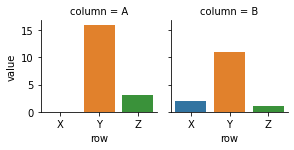

In [34]:
### Seaborn의 기능 중 한가지 예시입니다.
import seaborn as sns
sns.catplot(x = 'row', y = 'value', col = 'column', kind = 'bar', data = tidy1, height = 2);